### Notebook index

[3 Minimal examples](03-minimal.ipynb)  
[4 Plotting chromosomes](04-plotting.ipynb)   
[5 Multiple OTUs](05-multiple.ipynb)    
[6 Changing units](06-units.ipynb)  
[7 GISH](07-gish.ipynb)  
[8 Groups](08-groups.ipynb)  
[9 Circular Plots](09-circular.ipynb)  
[10 Plotting alongside phylogeny](10-phylogeny.ipynb)  
[11 Citrus](11-citrushelp.ipynb)  
[12 Human Karyotype](12-human.ipynb)  

# Groups

In [1]:
# General jupyter instructions

In [2]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn code cell into MARKDOWN
# Y turn markdown to CODE
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

# if in colab:
# remove bar at 80 in tools, preferences, 80 -> 0

In [3]:
# install if necessary

if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}

library(idiogramFISH)

version 2.0.6 See help: ?idiogramFISH - browseVignettes('idiogramFISH') - https://ferroao.gitlab.io/manualidiogramfish



## monocentrics

### Adding the column `group`

Open your chromosome data - Chr. size - as data.frame and add column

In [4]:
# Example data.frame written in R, use
dfwithgroups <-read.table(text="
      chrName shortArmSize longArmSize group
1        1            3           5     1
2        1            3.2         5.5   1
3        1            3.5         4.8   1
4        4            1           3     NA
5        5            3           5     NA
6        X            4           6     NA", header=TRUE, stringsAsFactors=F)
dfwithgroups        

,chrName,shortArmSize,longArmSize,group
,<chr>,<dbl>,<dbl>,<int>
1,1,3.0,5.0,1
2,1,3.2,5.5,1
3,1,3.5,4.8,1
4,4,1.0,3.0,NA
5,5,3.0,5.0,NA
6,X,4.0,6.0,NA


</div>
<div class="verysmall">

### Heteromorphic pairs

It can be used to plot heteromorphic pairs, see pair 1

In [5]:
dfwithHetero<-read.table(text="
       chrName shortArmSize longArmSize group
1        1A           3           5     1
2        1B           3           5     1
4        2            1           3     NA
5        3            3           5     NA
6        4            4           6     NA", header=TRUE, stringsAsFactors=FALSE)
dfwithHetero

,chrName,shortArmSize,longArmSize,group
,<chr>,<int>,<int>,<int>
1,1A,3,5,1
2,1B,3,5,1
4,2,1,3,NA
5,3,3,5,NA
6,4,4,6,NA


</div>
<div class="verysmall">

</div>

Open or write your mark positions as a data.frame. This data.frame has the marks present in all karyotypes with position info.
<div class="fold s">

In [6]:
dfOfMarksHetero<-read.table(text=
"     chrName markName chrRegion markSize markDistCen
1       1A       5S       p        1         0.9
2       1B      45S       p        1         0.9
3       2       CMA       q        1         1.0
4       3      DAPI       q        1         1.0", header=TRUE, stringsAsFactors=FALSE)
dfOfMarksHetero

,chrName,markName,chrRegion,markSize,markDistCen
,<chr>,<chr>,<chr>,<int>,<dbl>
1,1A,5S,p,1,0.9
2,1B,45S,p,1,0.9
3,2,CMA,q,1,1.0
4,3,DAPI,q,1,1.0


</div>
<div class="verysmall">

</div>

Plot

<div class="fold s">

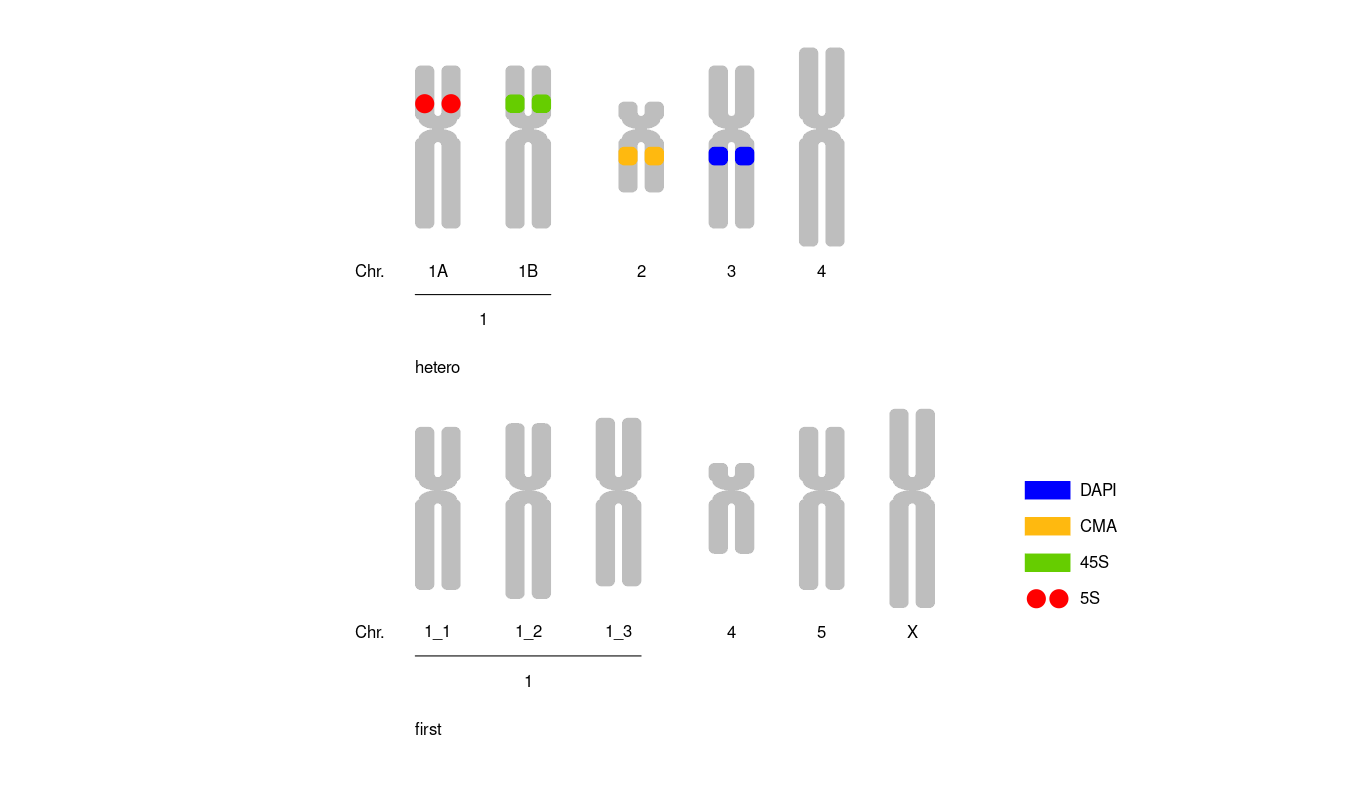

In [7]:
require(idiogramFISH)
# svg("dfwithHetero.svg",width=13.5,height=8 )
par(mar=rep(0,4)) 

dfwithHetero$OTU<-"hetero"
dfwithgroups$OTU<-"first"
both<-plyr::rbind.fill(dfwithHetero,dfwithgroups)
dfOfMarksHetero$OTU<-"hetero"

options(repr.plot.width = 13.5, repr.plot.height = 8, repr.plot.res = 100)
suppressMessages(
plotIdiograms(dfChrSize=both,    # chr. sizes
              dfMarkPos=dfOfMarksHetero, # position of marks
              karHeiSpace = 4,
              
              chrId="original",          # chr. name in df.
              chrIndex = "",             # do not add chr. indices
              morpho="",                 # do not add chr. morphologies  
              karIndex = FALSE,          # do not add karyotype indices
              distTextChr = .8,          # distance from text to chr.
              
              markDistType="cen",        # mark position measured to center of mark
              orderChr = "name",       # order chr. by name
              
              ruler=FALSE                # do not plot ruler
              
              ,ylimBotMod = 1            # modify ylim bottom argument
              ,legendWidth = 1           # width of legend
)
)
# dev.off()

</div>

## Holocentrics

Let's modify some data.frames to add a group


In [8]:
data("dfChrSizeHolo")
data("dfMarkPosHolo")
dfMarkPosHoloHetero<-dfMarkPosHolo
dfMarkPosHoloHetero$chrName<-c(3,3,"1A",2,"1B","1B")
dfMarkPosHoloHetero$OTU<-"heteromorphic"

dfChrSizeHoloHetero<-dfChrSizeHolo
dfChrSizeHoloHetero$chrName<-c("1A","1B",2,3)
dfChrSizeHoloHetero$OTU<-"heteromorphic"

# Adding the group column
dfChrSizeHoloHetero$group<-c(1,1,NA,NA)

### Creating a new data.frame for holocentrics

In [9]:
dfChrSizeHoloGroup<-data.frame(OTU="Species name", 
                               chrName=c(1,1,1,1,2,3,4), 
                               chrSize=c(3.1,3.2,3.3,3.4,4,5,6), 
                               group=c(1,1,1,1,NA,NA,NA) 
                               )
dfChrSizeHoloGroup

OTU,chrName,chrSize,group
<chr>,<dbl>,<dbl>,<dbl>
Species name,1,3.1,1
Species name,1,3.2,1
Species name,1,3.3,1
Species name,1,3.4,1
Species name,2,4.0,NA
Species name,3,5.0,NA
Species name,4,6.0,NA


</div>
<div class="verysmall">

</div>

<div class="fold s">

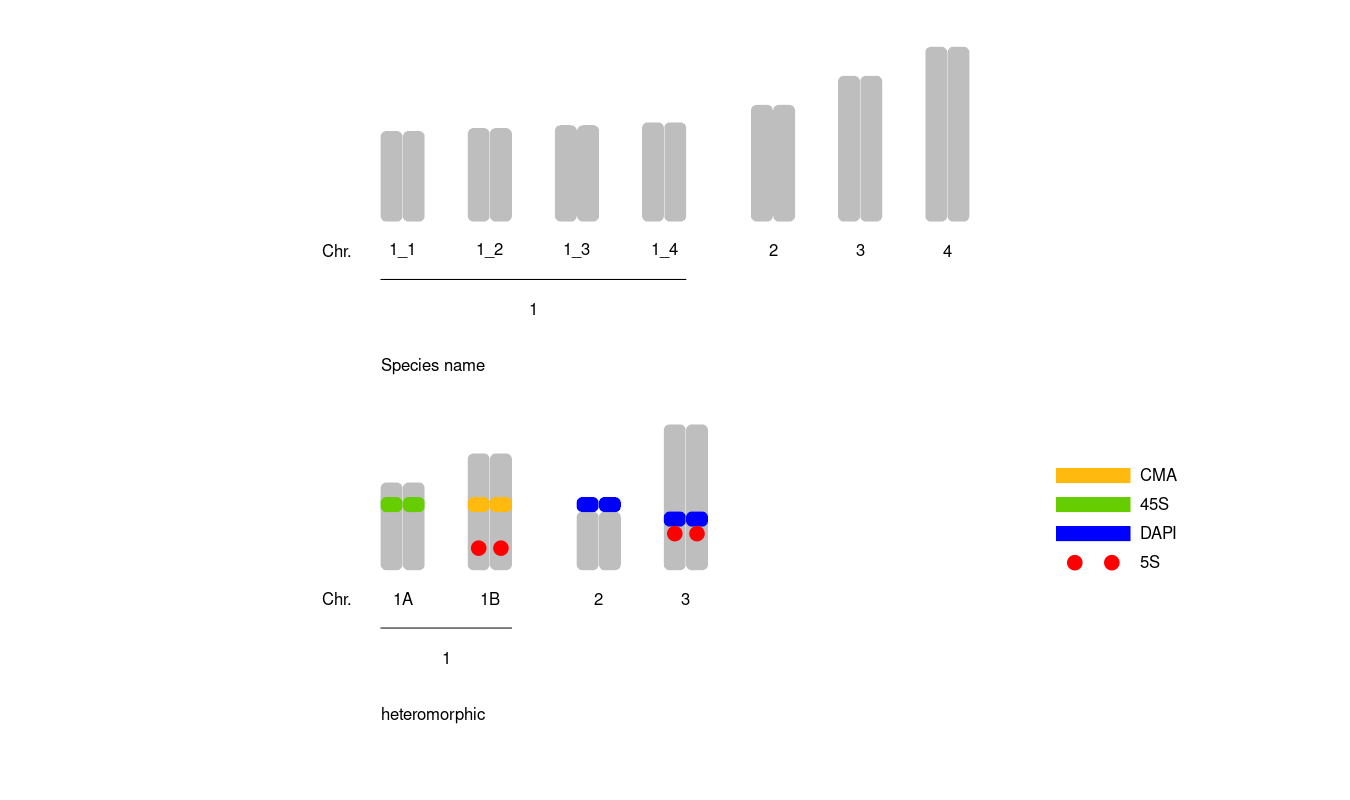

In [10]:
par(mar=rep(0,4)) 
mergedChrSize<-plyr::rbind.fill(dfChrSizeHoloGroup,dfChrSizeHoloHetero)

options(repr.plot.width = 13.5, repr.plot.height = 8, repr.plot.res = 100)
suppressMessages(
plotIdiograms(dfChrSize=mergedChrSize,      # data.frame of chr. sizes
              dfMarkPos=dfMarkPosHoloHetero,# d.f. of marks
              orderChr = "name",          # order chr. by name
              karIndex = FALSE,             # do not add karyotype indices
              addOTUName = TRUE,            # add OTU name
              karHeiSpace = 4,              # height of kar. with spacing
              
              ruler=FALSE,                  # no ruler
              
              xlimLeftMod=-1,               # modify left argument of xlim
              xlimRightMod=0,               # modify right argument of xlim
              ylimBotMod=1.3                # modify bottom argument of ylim
              ,xModifier = 100              # separ. among chromatids
)
)